In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Kaggle Competitions/Spaceship Titanic/train.csv")
df_test = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Kaggle Competitions/Spaceship Titanic/test.csv")
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Train Data Cleaning

In [3]:
df_train.duplicated().sum()

0

In [4]:
df_train.shape

(8693, 14)

In [5]:
(df_train.isnull().sum()/len(df_train))*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [6]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
# HomePlanet

df_train['HomePlanet'] = df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode())


In [8]:
df_train['HomePlanet'].isnull().sum()

201

In [9]:
df_train['HomePlanet'].value_counts()


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Earth')

In [11]:
# CryoSleep
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode().values[0])
df_train['CryoSleep'].isnull().sum()


0

In [12]:
df_train['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [13]:
# Cabin

df_train['Cabin'].sample(10)

2571     G/446/P
1618     F/339/P
1426     F/298/P
3583     F/725/S
1855     G/311/S
802      F/175/P
6749    F/1363/S
1244     F/266/P
6017      A/64/P
3808     B/155/S
Name: Cabin, dtype: object

In [14]:
df_train['Cabin'].dtypes

dtype('O')

In [15]:
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode().values[0])
df_train['Cabin'].isnull().sum()

0

In [16]:
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode().values[0])
df_train[['Cabin1', 'Cabin2', 'Cabin3']] = df_train['Cabin'].str.split('/', expand = True)
df_train.drop(['Cabin', 'Cabin1', 'Cabin2'], axis = 1, inplace = True)
df_train = df_train.rename(columns = {'Cabin3':'Cabin'})

In [17]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,S


In [18]:
df_train['Cabin'].isnull().sum()

0

In [19]:
# Destination

df_train['Destination'].sample(10)

7542      TRAPPIST-1e
5468      TRAPPIST-1e
6893      TRAPPIST-1e
2353      55 Cancri e
3442      55 Cancri e
3186    PSO J318.5-22
2976      TRAPPIST-1e
1248      55 Cancri e
1265      TRAPPIST-1e
973     PSO J318.5-22
Name: Destination, dtype: object

In [20]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [21]:
df_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [22]:
df_train['Destination'] = df_train['Destination'].replace({'TRAPPIST-1e':'TRAPPIST', '55 Cancri e':'CANCRI', 'PSO J318.5-22':'PSO'})
df_train['Destination'].value_counts()

TRAPPIST    5915
CANCRI      1800
PSO          796
Name: Destination, dtype: int64

In [23]:
df_train['Destination'] = df_train['Destination'].fillna(df_train['Destination'].mode().values[0])
df_train['Destination'].isnull().sum()

0

In [24]:
# Age

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode().values[0])
df_train['Age'].isnull().sum()

0

In [25]:
# VIP

df_train['VIP'] = df_train['VIP'].fillna(df_train['VIP'].mode().values[0])
df_train['VIP'].isnull().sum()

0

In [26]:
df_train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [27]:
df_train['VIP'].sample(5)
df_train['VIP'] = df_train['VIP'].astype('object')
df_train['VIP'].dtypes

dtype('O')

In [28]:
# RoomService

df_train['RoomService'].dtype

dtype('float64')

In [29]:
df_train['RoomService'] = df_train['RoomService'].fillna(df_train['RoomService'].mean())
df_train['RoomService'].isnull().sum()

0

In [30]:
df_train['RoomService'] = df_train['RoomService'].astype(int)

In [31]:
# ShoppingMall

df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].mean())
df_train['ShoppingMall'].isnull().sum()

0

In [32]:
df_train['ShoppingMall'] = df_train['ShoppingMall'].astype(int)

In [33]:
# Spa

df_train['Spa'] = df_train['Spa'].fillna(df_train['Spa'].mean())
df_train['Spa'].isnull().sum()
df_train['Spa'] = df_train['Spa'].astype(int)


In [34]:
# VRDeck

df_train['VRDeck'] = df_train['VRDeck'].fillna(df_train['VRDeck'].mean())
df_train['VRDeck'].isnull().sum()
df_train['VRDeck'] = df_train['VRDeck'].astype(int)

In [35]:
# Transported

df_train['Transported'].unique()

array([False,  True])

In [36]:
df_train.shape

(8693, 14)

In [37]:
(df_train.isnull().sum()/len(df_train))*100

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       2.105142
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.300702
Transported     0.000000
Cabin           0.000000
dtype: float64

In [38]:
# FoodCourt

df_train['FoodCourt'] = df_train['FoodCourt'].fillna(df_train['FoodCourt'].mean())
df_train['FoodCourt'].isnull().sum()
df_train['FoodCourt'] = df_train['FoodCourt'].astype(int)

In [39]:
# Name

df_train['Name'].sample(10)

8664                   NaN
3169          Berers Meake
4077       Arino Trupistic
6841    Gaylah Leonadorsen
6827           Gerte Owery
6143          Chtios Letie
1884       Candyn Gregordy
3827          Deaney Romez
274      Oraryn Kirklander
3824          Honjay Ruica
Name: Name, dtype: object

In [40]:
df_train['Name'].unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

In [41]:
df_train.dropna(subset = ['Name'], inplace = True)
df_train['Name'].isnull().sum()

0

In [42]:
(df_train.isnull().sum()/len(df_train))*100

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
Cabin           0.0
dtype: float64

In [43]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP              object
RoomService       int32
FoodCourt         int32
ShoppingMall      int32
Spa               int32
VRDeck            int32
Name             object
Transported        bool
Cabin            object
dtype: object

In [44]:
df_train.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin
count,8493,8493,8493,8493,8493.000000,8493,8493.000000,8493.000000,8493.000000,8493.000000,8493.000000,8493,8493,8493
unique,8493,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,2
top,0001_01,Earth,False,TRAPPIST,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,S
freq,1,4690,5518,5957,NaN,8297,NaN,NaN,NaN,NaN,NaN,2,4277,4381
mean,NaN,NaN,NaN,NaN,28.745908,NaN,224.107854,457.978335,171.896621,311.584952,302.062287,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.329453,NaN,658.922169,1597.074165,546.602749,1130.950429,1105.792644,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,78.000000,120.000000,45.000000,89.000000,72.000000,NaN,NaN,NaN


# Univariate Analysis & Outlier Removal - Train Data

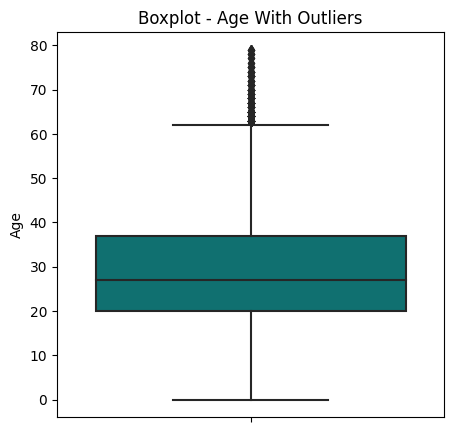

In [45]:
# Age

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, y = 'Age', color = 'teal')
plt.title('Boxplot - Age With Outliers');

In [46]:
Q3 = df_train['Age'].quantile(.75)
Q1 = df_train['Age'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

62.5
-5.5


In [47]:
df_train['Age'] = np.where(df_train['Age'] > 62.5, 62.5, np.where(df_train['Age'] < -5.5, -5.5, df_train['Age']))

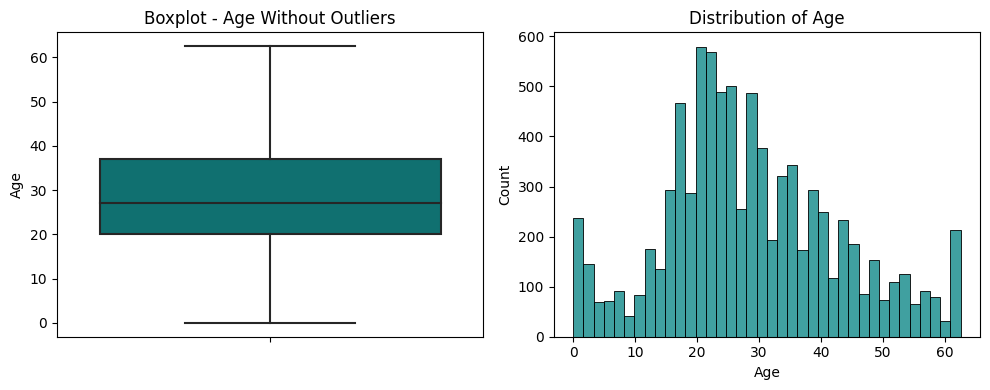

In [48]:
# Age

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - Age Without Outliers
sns.boxplot(data = df_train, y = 'Age', color = 'teal', ax=axes[0])
axes[0].set_title('Boxplot - Age Without Outliers');

# Subplot 2 - Age Distribution
sns.histplot(data = df_train, x = 'Age', color = 'teal', ax=axes[1])
axes[1].set_title('Distribution of Age');

plt.tight_layout()
plt.show()

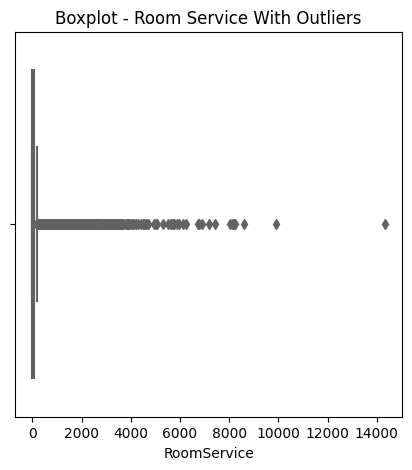

In [49]:
# RoomService

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, x = 'RoomService', color = 'tomato')
plt.title('Boxplot - Room Service With Outliers');

In [50]:
Q3 = df_train['RoomService'].quantile(.75)
Q1 = df_train['RoomService'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

195.0
-117.0


In [51]:
df_train['RoomService'] = np.where(df_train['RoomService'] > 195, 195, np.where(df_train['RoomService'] < -117, -117, df_train['RoomService']))

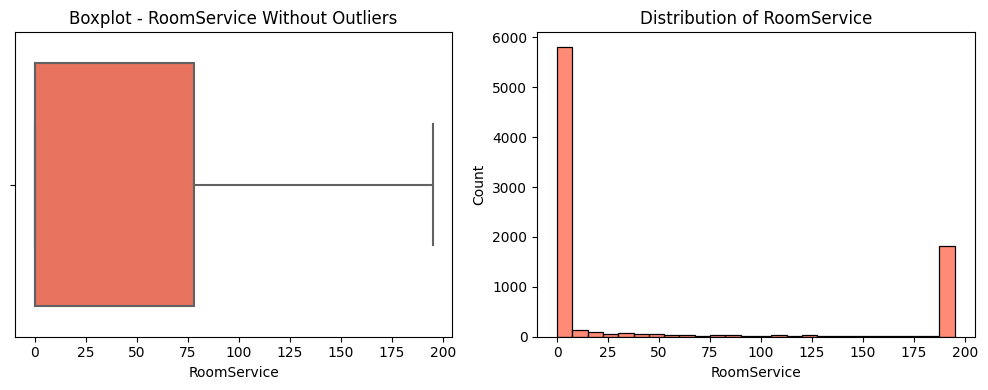

In [52]:
# RoomService

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - RoomService Without Outliers
sns.boxplot(data = df_train, x = 'RoomService', color = 'tomato', ax=axes[0])
axes[0].set_title('Boxplot - RoomService Without Outliers');

# Subplot 2 - RoomService Distribution
sns.histplot(data = df_train, x = 'RoomService', color = 'tomato', ax=axes[1])
axes[1].set_title('Distribution of RoomService');

plt.tight_layout()
plt.show()

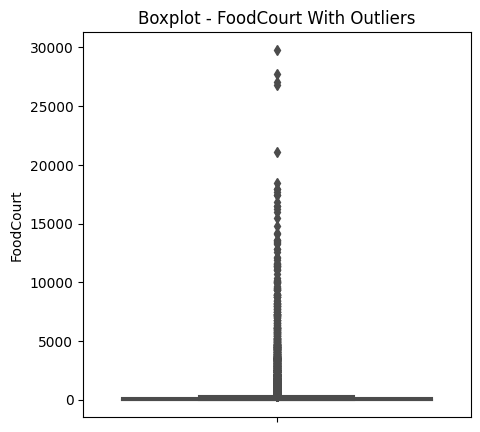

In [53]:
# FoodCourt

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, y = 'FoodCourt', color = 'springgreen')
plt.title('Boxplot - FoodCourt With Outliers');

In [54]:
Q3 = df_train['FoodCourt'].quantile(.75)
Q1 = df_train['FoodCourt'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

300.0
-180.0


In [55]:
df_train['FoodCourt'] = np.where(df_train['FoodCourt'] > 300, 300, np.where(df_train['FoodCourt'] < -180, -180, df_train['FoodCourt']))

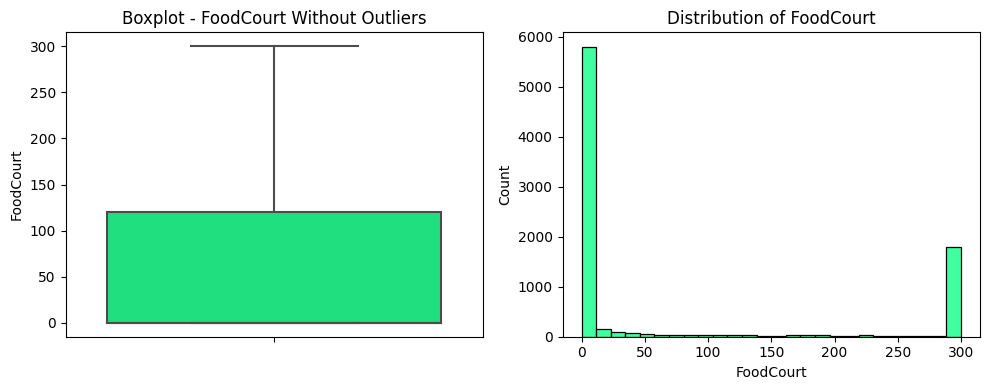

In [56]:
# FoodCourt

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - FoodCourt Without Outliers
sns.boxplot(data = df_train, y = 'FoodCourt', color = 'springgreen', ax=axes[0])
axes[0].set_title('Boxplot - FoodCourt Without Outliers');

# Subplot 2 - FoodCourt Distribution
sns.histplot(data = df_train, x = 'FoodCourt', color = 'springgreen', ax=axes[1])
axes[1].set_title('Distribution of FoodCourt');

plt.tight_layout()
plt.show()

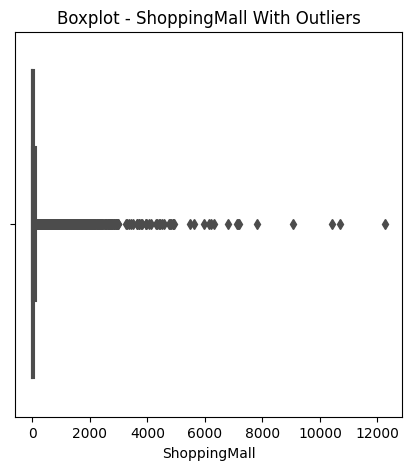

In [57]:
# ShoppingMall

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, x = 'ShoppingMall', color = 'gold')
plt.title('Boxplot - ShoppingMall With Outliers');

In [58]:
Q3 = df_train['ShoppingMall'].quantile(.75)
Q1 = df_train['ShoppingMall'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

112.5
-67.5


In [59]:
df_train['ShoppingMall'] = np.where(df_train['ShoppingMall'] > 112, 112, np.where(df_train['ShoppingMall'] < -67, -67, df_train['ShoppingMall']))

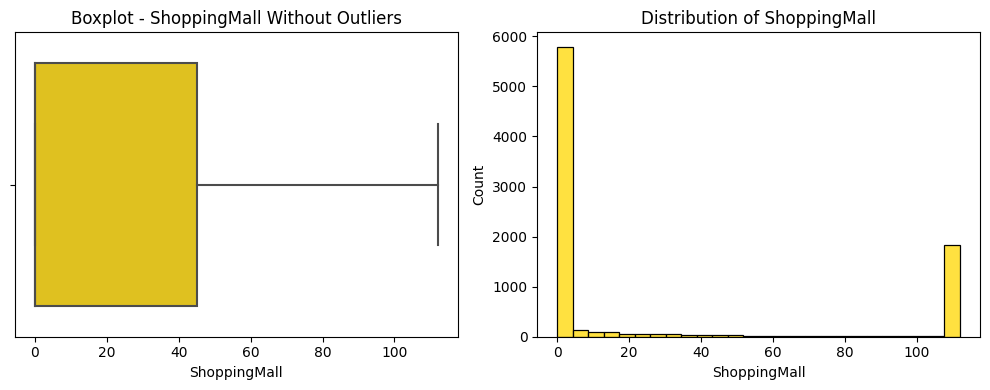

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - ShoppingMall Without Outliers
sns.boxplot(data = df_train, x = 'ShoppingMall', color = 'gold', ax=axes[0])
axes[0].set_title('Boxplot - ShoppingMall Without Outliers');

# Subplot 2 - ShoppingMall Distribution
sns.histplot(data = df_train, x = 'ShoppingMall', color = 'gold', ax=axes[1])
axes[1].set_title('Distribution of ShoppingMall');

plt.tight_layout()
plt.show()

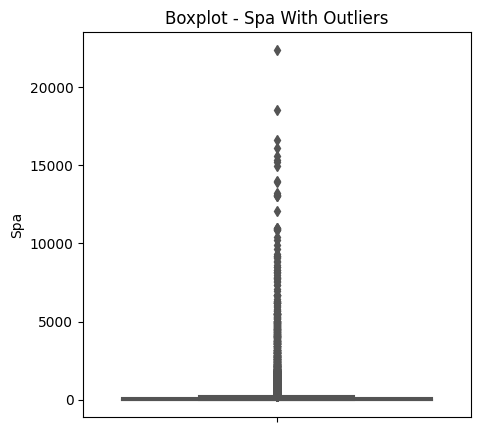

In [61]:
# Spa

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, y = 'Spa', color = 'mediumturquoise')
plt.title('Boxplot - Spa With Outliers');

In [62]:
Q3 = df_train['Spa'].quantile(.75)
Q1 = df_train['Spa'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

222.5
-133.5


In [63]:
df_train['Spa'] = np.where(df_train['Spa'] > 222.5, 222.5, np.where(df_train['Spa'] < -133, -133, df_train['Spa']))

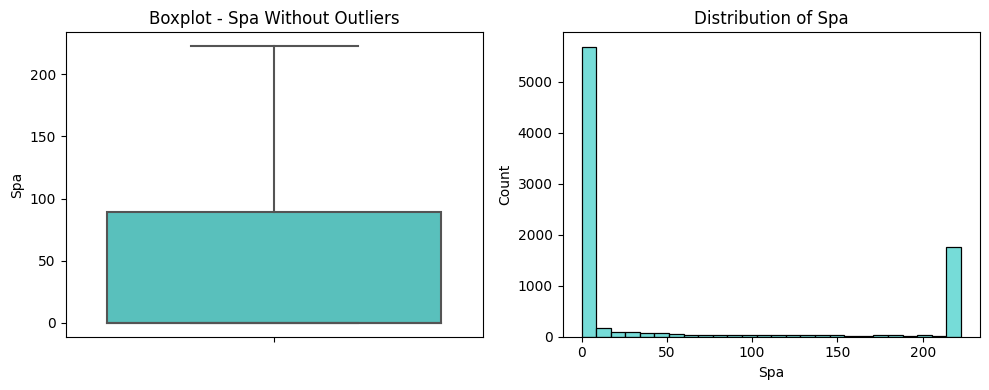

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - Spa Without Outliers
sns.boxplot(data = df_train, y = 'Spa', color = 'mediumturquoise', ax=axes[0])
axes[0].set_title('Boxplot - Spa Without Outliers');

# Subplot 2 - Spa Distribution
sns.histplot(data = df_train, x = 'Spa', color = 'mediumturquoise', ax=axes[1])
axes[1].set_title('Distribution of Spa');

plt.tight_layout()
plt.show()

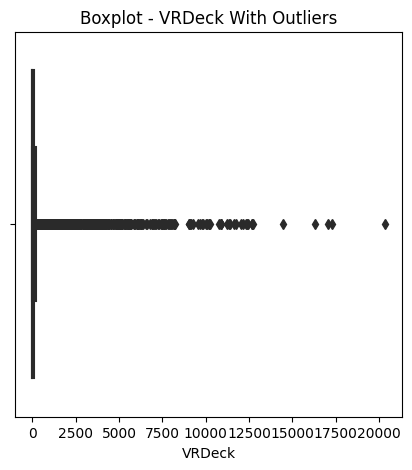

In [65]:
# VRDeck

plt.figure(figsize = (5,5))
sns.boxplot(data = df_train, x = 'VRDeck', color = 'darkred')
plt.title('Boxplot - VRDeck With Outliers');


In [66]:
Q3 = df_train['VRDeck'].quantile(.75)
Q1 = df_train['VRDeck'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(UL)
print(LL)

180.0
-108.0


In [67]:
df_train['VRDeck'] = np.where(df_train['VRDeck'] > 180, 180, np.where(df_train['VRDeck'] < -108, -108, df_train['VRDeck']))

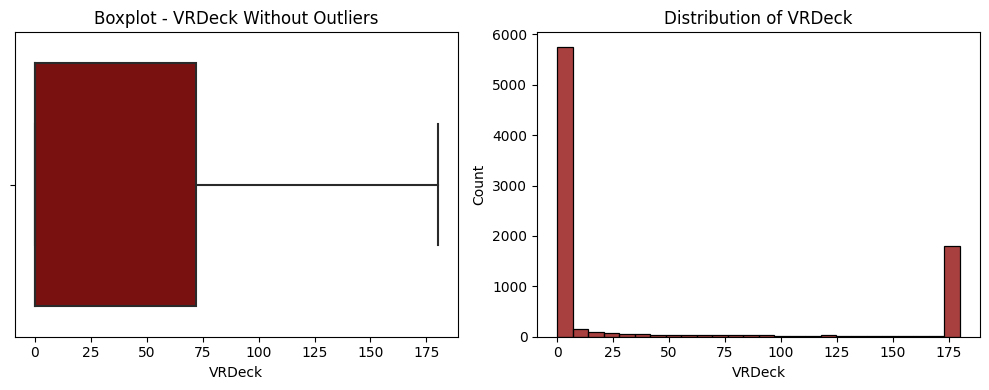

In [68]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1 - VRDeck Without Outliers
sns.boxplot(data = df_train, x = 'VRDeck', color = 'darkred', ax=axes[0])
axes[0].set_title('Boxplot - VRDeck Without Outliers');

# Subplot 2 - VRDeck Distribution
sns.histplot(data = df_train, x = 'VRDeck', color = 'darkred', ax=axes[1])
axes[1].set_title('Distribution of VRDeck');

plt.tight_layout()
plt.show()

In [69]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP              object
RoomService       int32
FoodCourt         int32
ShoppingMall      int32
Spa             float64
VRDeck            int32
Name             object
Transported        bool
Cabin            object
dtype: object

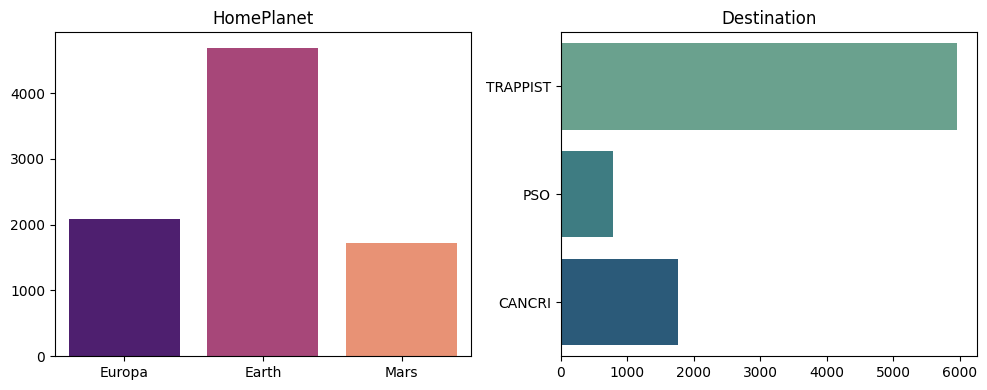

In [70]:
# HomePlanet and Destination

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1: HomePlanet
sns.countplot(data = df_train, x = 'HomePlanet', palette = 'magma', ax=axes[0])
axes[0].set_title('HomePlanet');
axes[0].set_xlabel('');
axes[0].set_ylabel('');

# Subplot 2: Destination
sns.countplot(data = df_train, y = 'Destination', palette = 'crest', ax=axes[1])
axes[1].set_title('Destination');
axes[1].set_xlabel('');
axes[1].set_ylabel('');


plt.tight_layout()
plt.show()

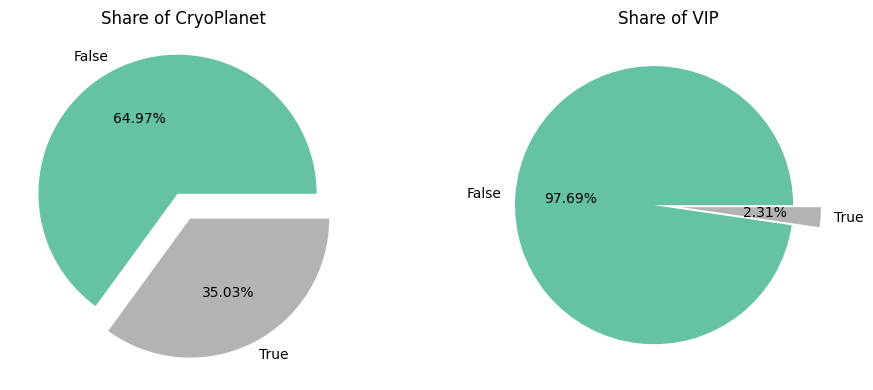

In [71]:
# CryoSlee and VIP

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1: CryoSleep
df_train['CryoSleep'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1], cmap = 'Set2', ax=axes[0])
axes[0].set_title('Share of CryoPlanet');
axes[0].set_xlabel('');
axes[0].set_ylabel('');

# Subplot 2: VIP
df_train['VIP'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1], cmap = 'Set2', ax=axes[1])
axes[1].set_title('Share of VIP');
axes[1].set_xlabel('');
axes[1].set_ylabel('');

plt.tight_layout()
plt.show()

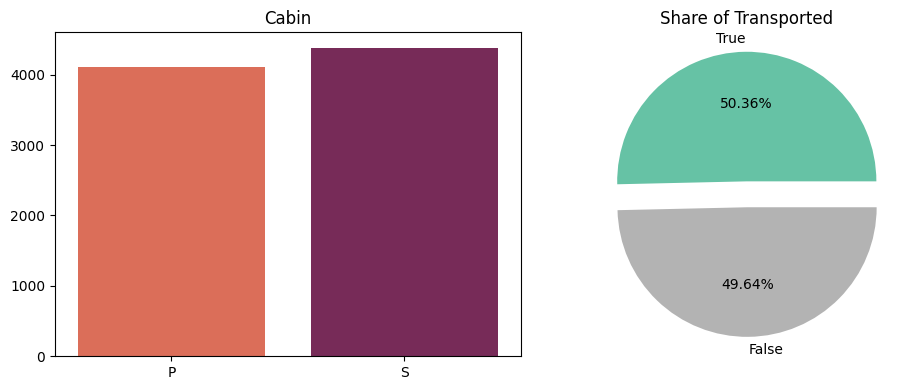

In [72]:
# Cabin and Transported

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

# Subplot 1: Cabin
sns.countplot(data = df_train, x = 'Cabin', palette = 'rocket_r', ax=axes[0])
axes[0].set_title('Cabin');
axes[0].set_xlabel('');
axes[0].set_ylabel('');

# Subplot 2: Transported
df_train['Transported'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1, 0.1], cmap = 'Set2', ax=axes[1])
axes[1].set_title('Share of Transported');
axes[1].set_xlabel('');
axes[1].set_ylabel('');

plt.tight_layout()
plt.show()

# Multivariate Analysis - Train Data

In [73]:
# Lets review our columns before we go ahead with Multivariate Analysis:

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin
0,0001_01,Europa,False,TRAPPIST,39.0,False,0,0,0,0.0,0,Maham Ofracculy,False,P
1,0002_01,Earth,False,TRAPPIST,24.0,False,109,9,25,222.5,44,Juanna Vines,True,S
2,0003_01,Europa,False,TRAPPIST,58.0,True,43,300,0,222.5,49,Altark Susent,False,S
3,0003_02,Europa,False,TRAPPIST,33.0,False,0,300,112,222.5,180,Solam Susent,False,S
4,0004_01,Earth,False,TRAPPIST,16.0,False,195,70,112,222.5,2,Willy Santantines,True,S


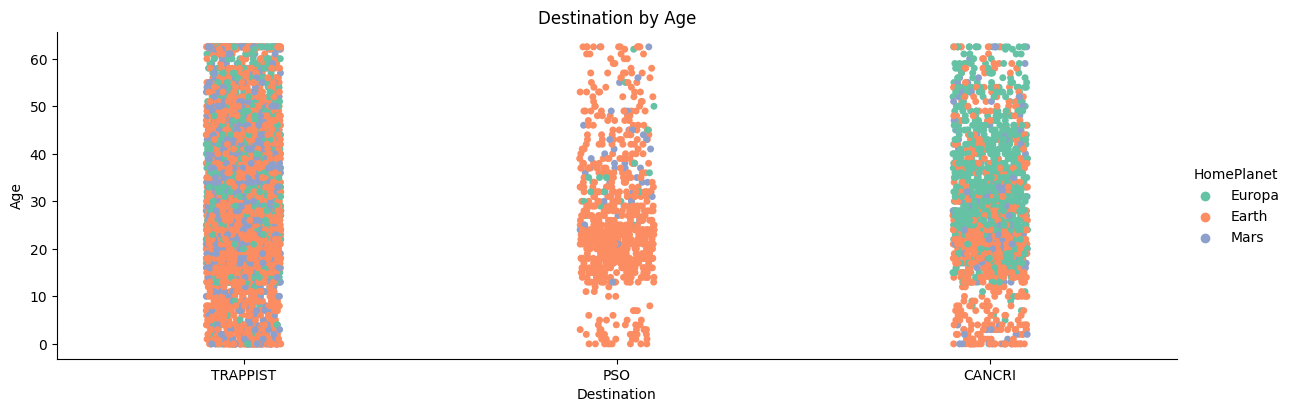

In [74]:
# Catplot - Destination, Age, HomePlanet

sns.catplot(data = df_train, x = 'Destination', y = 'Age', hue = 'HomePlanet', palette = 'Set2', height = 4, aspect = 3);
plt.title('Destination by Age');

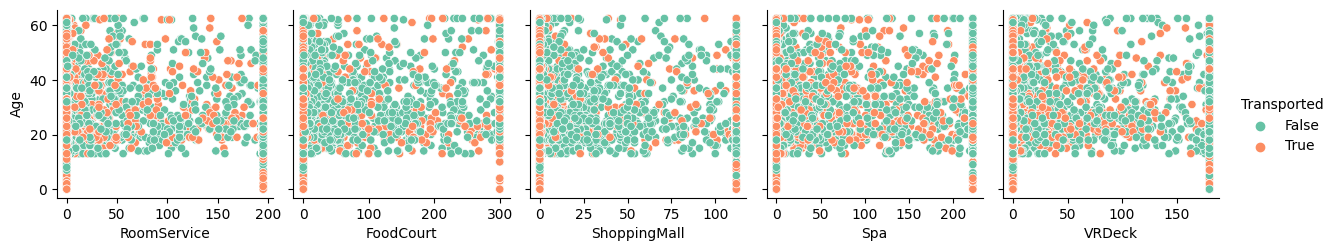

In [75]:
# Pairplot

sns.pairplot(data = df_train, x_vars = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], y_vars = 'Age', palette = 'Set2', hue = 'Transported');

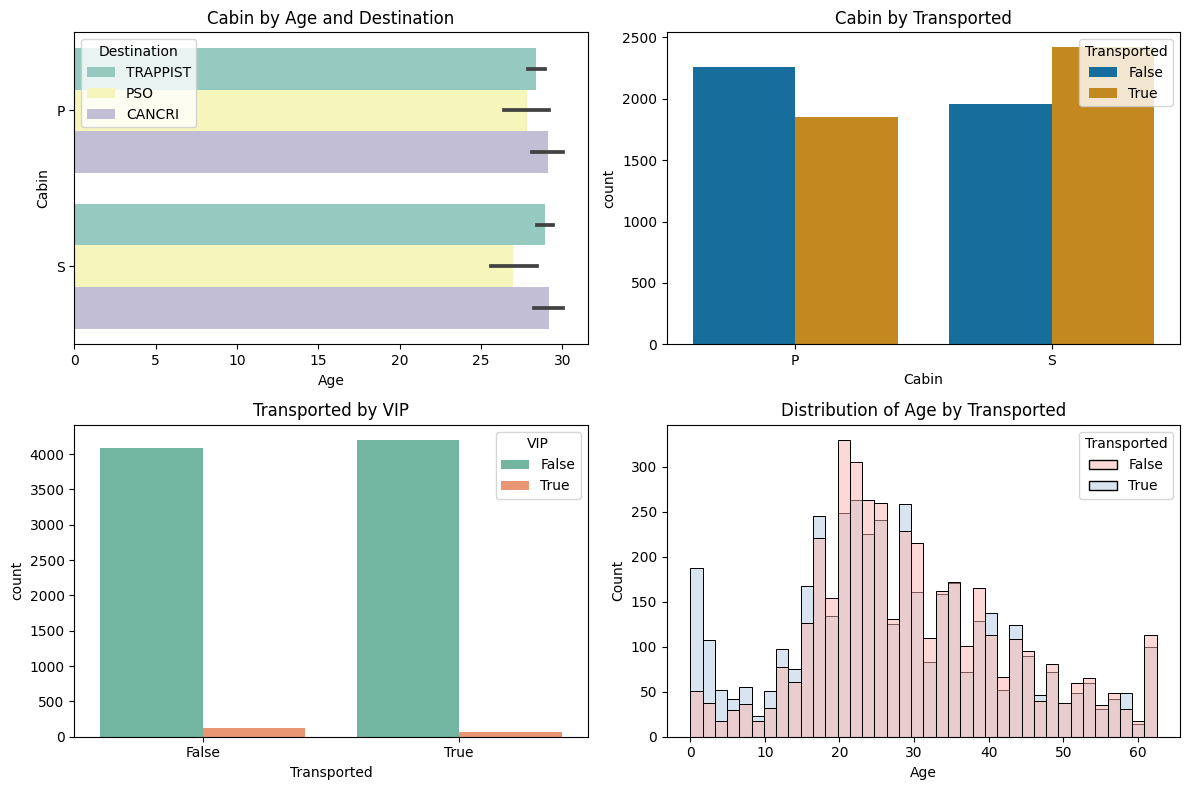

In [76]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

# Subplot 1:
sns.barplot(data = df_train, y = 'Cabin', x = 'Age', hue = 'Destination', palette = 'Set3', ax=axes[0,0]);
axes[0,0].set_title('Cabin by Age and Destination');

# Subplot 2:
sns.countplot(data = df_train, x = 'Cabin', hue = 'Transported', palette = 'colorblind', ax=axes[0,1])
axes[0,1].set_title('Cabin by Transported');

# Subplot 3:
sns.countplot(data = df_train, x = 'Transported', hue = 'VIP', palette = 'Set2', ax=axes[1,0])
axes[1,0].set_title('Transported by VIP');

# Subplot 4: 
sns.histplot(data = df_train, x = 'Age', hue = 'Transported', palette = 'Pastel1', ax=axes[1,1])
axes[1,1].set_title('Distribution of Age by Transported');

plt.tight_layout()
plt.show()

# Test Data Cleaning

In [77]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [78]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin
0,0001_01,Europa,False,TRAPPIST,39.0,False,0,0,0,0.0,0,Maham Ofracculy,False,P
1,0002_01,Earth,False,TRAPPIST,24.0,False,109,9,25,222.5,44,Juanna Vines,True,S
2,0003_01,Europa,False,TRAPPIST,58.0,True,43,300,0,222.5,49,Altark Susent,False,S
3,0003_02,Europa,False,TRAPPIST,33.0,False,0,300,112,222.5,180,Solam Susent,False,S
4,0004_01,Earth,False,TRAPPIST,16.0,False,195,70,112,222.5,2,Willy Santantines,True,S


In [79]:
(df_test.isnull().sum()/len(df_test))*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

In [80]:
df_test.duplicated().sum()

0

In [81]:
# HomePlanet
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode())
df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Earth')

In [82]:
# CryoSleep
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode().values[0])
df_test['CryoSleep'].isnull().sum()

0

In [83]:
# Cabin
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode().values[0])
df_test[['Cabin1', 'Cabin2', 'Cabin3']] = df_test['Cabin'].str.split('/', expand = True)
df_test.drop(['Cabin', 'Cabin1', 'Cabin2'], axis = 1, inplace = True)
df_test = df_test.rename(columns = {'Cabin3':'Cabin'})

In [84]:
# Destination
df_test['Destination'] = df_test['Destination'].replace({'TRAPPIST-1e':'TRAPPIST', '55 Cancri e':'CANCRI', 'PSO J318.5-22':'PSO'})
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode().values[0])
df_test['Destination'].isnull().sum()

0

In [85]:
# Age
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode().values[0])
df_test['Age'].isnull().sum()

0

In [86]:
# VIP
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode().values[0])
df_test['VIP'] = df_test['VIP'].astype('object')
df_test['VIP'].dtypes


dtype('O')

In [87]:
# RoomService, ShoppingMall, Spa, VRDeck

df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].mean())
df_test['RoomService'] = df_test['RoomService'].astype(int)

df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mean())
df_test['ShoppingMall'] = df_test['ShoppingMall'].astype(int)

df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].mean())
df_test['Spa'] = df_test['Spa'].astype(int)

df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].mean())
df_test['VRDeck'] = df_test['VRDeck'].astype(int)

In [88]:
# FoodCourt

df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].mean())
df_test['FoodCourt'] = df_test['FoodCourt'].astype(int)

In [89]:
(df_test.isnull().sum()/len(df_test))*100

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.197802
Cabin           0.000000
dtype: float64

In [90]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin
0,0013_01,Earth,True,TRAPPIST,27.0,False,0,0,0,0,0,Nelly Carsoning,S
1,0018_01,Earth,False,TRAPPIST,19.0,False,0,9,0,2823,0,Lerome Peckers,S
2,0019_01,Europa,True,CANCRI,31.0,False,0,0,0,0,0,Sabih Unhearfus,S
3,0021_01,Europa,False,TRAPPIST,38.0,False,0,6652,0,181,585,Meratz Caltilter,S
4,0023_01,Earth,False,TRAPPIST,20.0,False,10,0,635,0,0,Brence Harperez,S


### Outliers Removal - Test Data

In [91]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.00000
mean,28.431377,219.261164,439.472294,177.288754,303.051204,310.69675
std,14.111469,601.162848,1508.609203,554.357253,1103.913087,1235.27461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.00000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.00000


In [92]:
# Outlier Removal through IQR using a loop

columns = ['Age', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck', 'RoomService']

Q3 = df_test[columns].quantile(0.75)
Q1 = df_test[columns].quantile(0.25)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

for column in columns:
    df_test[column] = np.where(df_test[column] > UL[column], UL[column],
                               np.where(df_test[column] < -LL[column], -LL[column], df_test[column]))

In [93]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.700257,136.101590,245.716741,87.730185,142.847089,91.228080
std,13.344589,32.506438,58.387951,20.943553,34.104380,21.787488
min,8.000000,118.500000,214.500000,76.500000,124.500000,79.500000
25%,19.000000,118.500000,214.500000,76.500000,124.500000,79.500000
50%,26.000000,118.500000,214.500000,76.500000,124.500000,79.500000
75%,37.000000,118.500000,214.500000,76.500000,124.500000,79.500000
max,64.000000,197.500000,357.500000,127.500000,207.500000,132.500000


# Converting Dataframe into Numeric

In [94]:
df_train.drop(['Name'], axis = 1, inplace = True)
df_test.drop(['Name'], axis = 1, inplace = True)

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']:
    df_train[i] = encoder.fit_transform(df_train[i])
    df_test[i] = encoder.transform(df_test[i])

In [96]:
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin
0,0001_01,1,0,2,39.0,0,0,0,0,0.0,0,False,0
1,0002_01,0,0,2,24.0,0,109,9,25,222.5,44,True,1
2,0003_01,1,0,2,58.0,1,43,300,0,222.5,49,False,1
3,0003_02,1,0,2,33.0,0,0,300,112,222.5,180,False,1
4,0004_01,0,0,2,16.0,0,195,70,112,222.5,2,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0,300,0,222.5,74,False,0
8689,9278_01,0,1,1,18.0,0,0,0,0,0.0,0,False,1
8690,9279_01,0,0,2,26.0,0,0,0,112,1.0,0,True,1
8691,9280_01,1,0,0,32.0,0,0,300,0,222.5,180,False,1


In [97]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin
0,0013_01,0,1,2,27.0,0,118.5,214.5,76.5,124.5,79.5,1
1,0018_01,0,0,2,19.0,0,118.5,214.5,76.5,207.5,79.5,1
2,0019_01,1,1,0,31.0,0,118.5,214.5,76.5,124.5,79.5,1
3,0021_01,1,0,2,38.0,0,118.5,357.5,76.5,181.0,132.5,1
4,0023_01,0,0,2,20.0,0,118.5,214.5,127.5,124.5,79.5,1


# Multicollinearity Check

C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_14804\3327173833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot = True, vmax = 1, vmin = -1)


<Axes: >

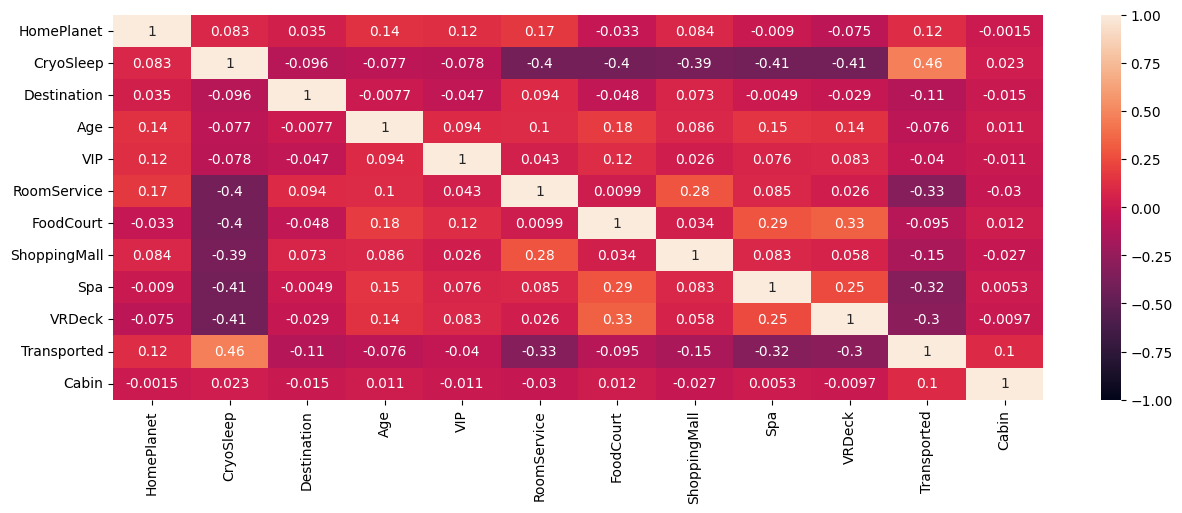

In [98]:
plt.figure(figsize = (15,5))
sns.heatmap(df_train.corr(), annot = True, vmax = 1, vmin = -1)

As none of the features have correlation above 0.75, we can say that our model doesn't contain much of multicollinearity.

# Classification  - RandomForestClassifier

In [99]:
x = df_train.drop(['Transported'], axis = 1)
y = df_train['Transported']

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True)

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [102]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.7608225764532618

In [104]:
y_pred = rf.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7655690041768641

In [105]:
y_pred = rf.predict(df_test)
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [106]:
df_test['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [107]:
submission_id = df_test['PassengerId']

In [108]:
result = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': y_pred})
result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [109]:
import os
result.to_csv("C:/Users/Pritam Laskar/Documents/Projects/Kaggle Competitions/Spaceship Titanic/sample_submission.csv", index = False)